# Amazon Automotive Products Search Engine

### Three technologis:

#### 1. MongoDB
-Retrieve the dataset from the MongoDB collection containing product reviews and customer information.

-Conduct separate analyses for each of the following factors: Parent ASIN, Store Name, and User ID to understand their impact on customer attraction to products.

#### 2. Flask
-Connect to MongoDB to aggregate relevant data and information about automotive products

-Create a user-friendly web interface where Amazon customers can easily search for automotive products. 

#### 3. Neo4j (details in Neo4j_final.ipynb)
-Model Amazon customer interactions, product correlations

-Use graph databases to identify interactions between customers, products, and other entities

## Importing Data into MongoDB and Performing Product Analysis

In [9]:
import json
from pymongo import MongoClient

In [10]:
client = MongoClient("mongodb://localhost:27017/")
db = client.amazon_apan5400 

In [11]:
#import amazon combined dataset
import json

json_data = open("/Users/wenz/Downloads/combined_data.jsonl").readlines()
newsfeeds = []
for line in json_data:
    newsfeeds.append(json.loads(line))
print(len(newsfeeds))
print(newsfeeds[0])

2003117
{'rating': 5.0, 'title': 'Tyger Auto T1 Soft Roll Up Truck Bed Tonneau Cover Compatible with 2004-2012 Chevy Colorado / GMC Canyon; 2006-2008 Isuzu I280 | Fleetside 6\'1" Bed (72") | TG-BC1C9002', 'parent_asin': 'B0BV88374L', 'user_id': 'AHMUTK5MAIDB7NQZQYH5NIOPT6BQ', 'average_rating': 4.8, 'rating_number': 5239, 'price': 207.0, 'store': 'Tyger Auto', 'categories': ['Automotive', 'Exterior Accessories', 'Truck Bed & Tailgate Accessories', 'Tonneau Covers']}


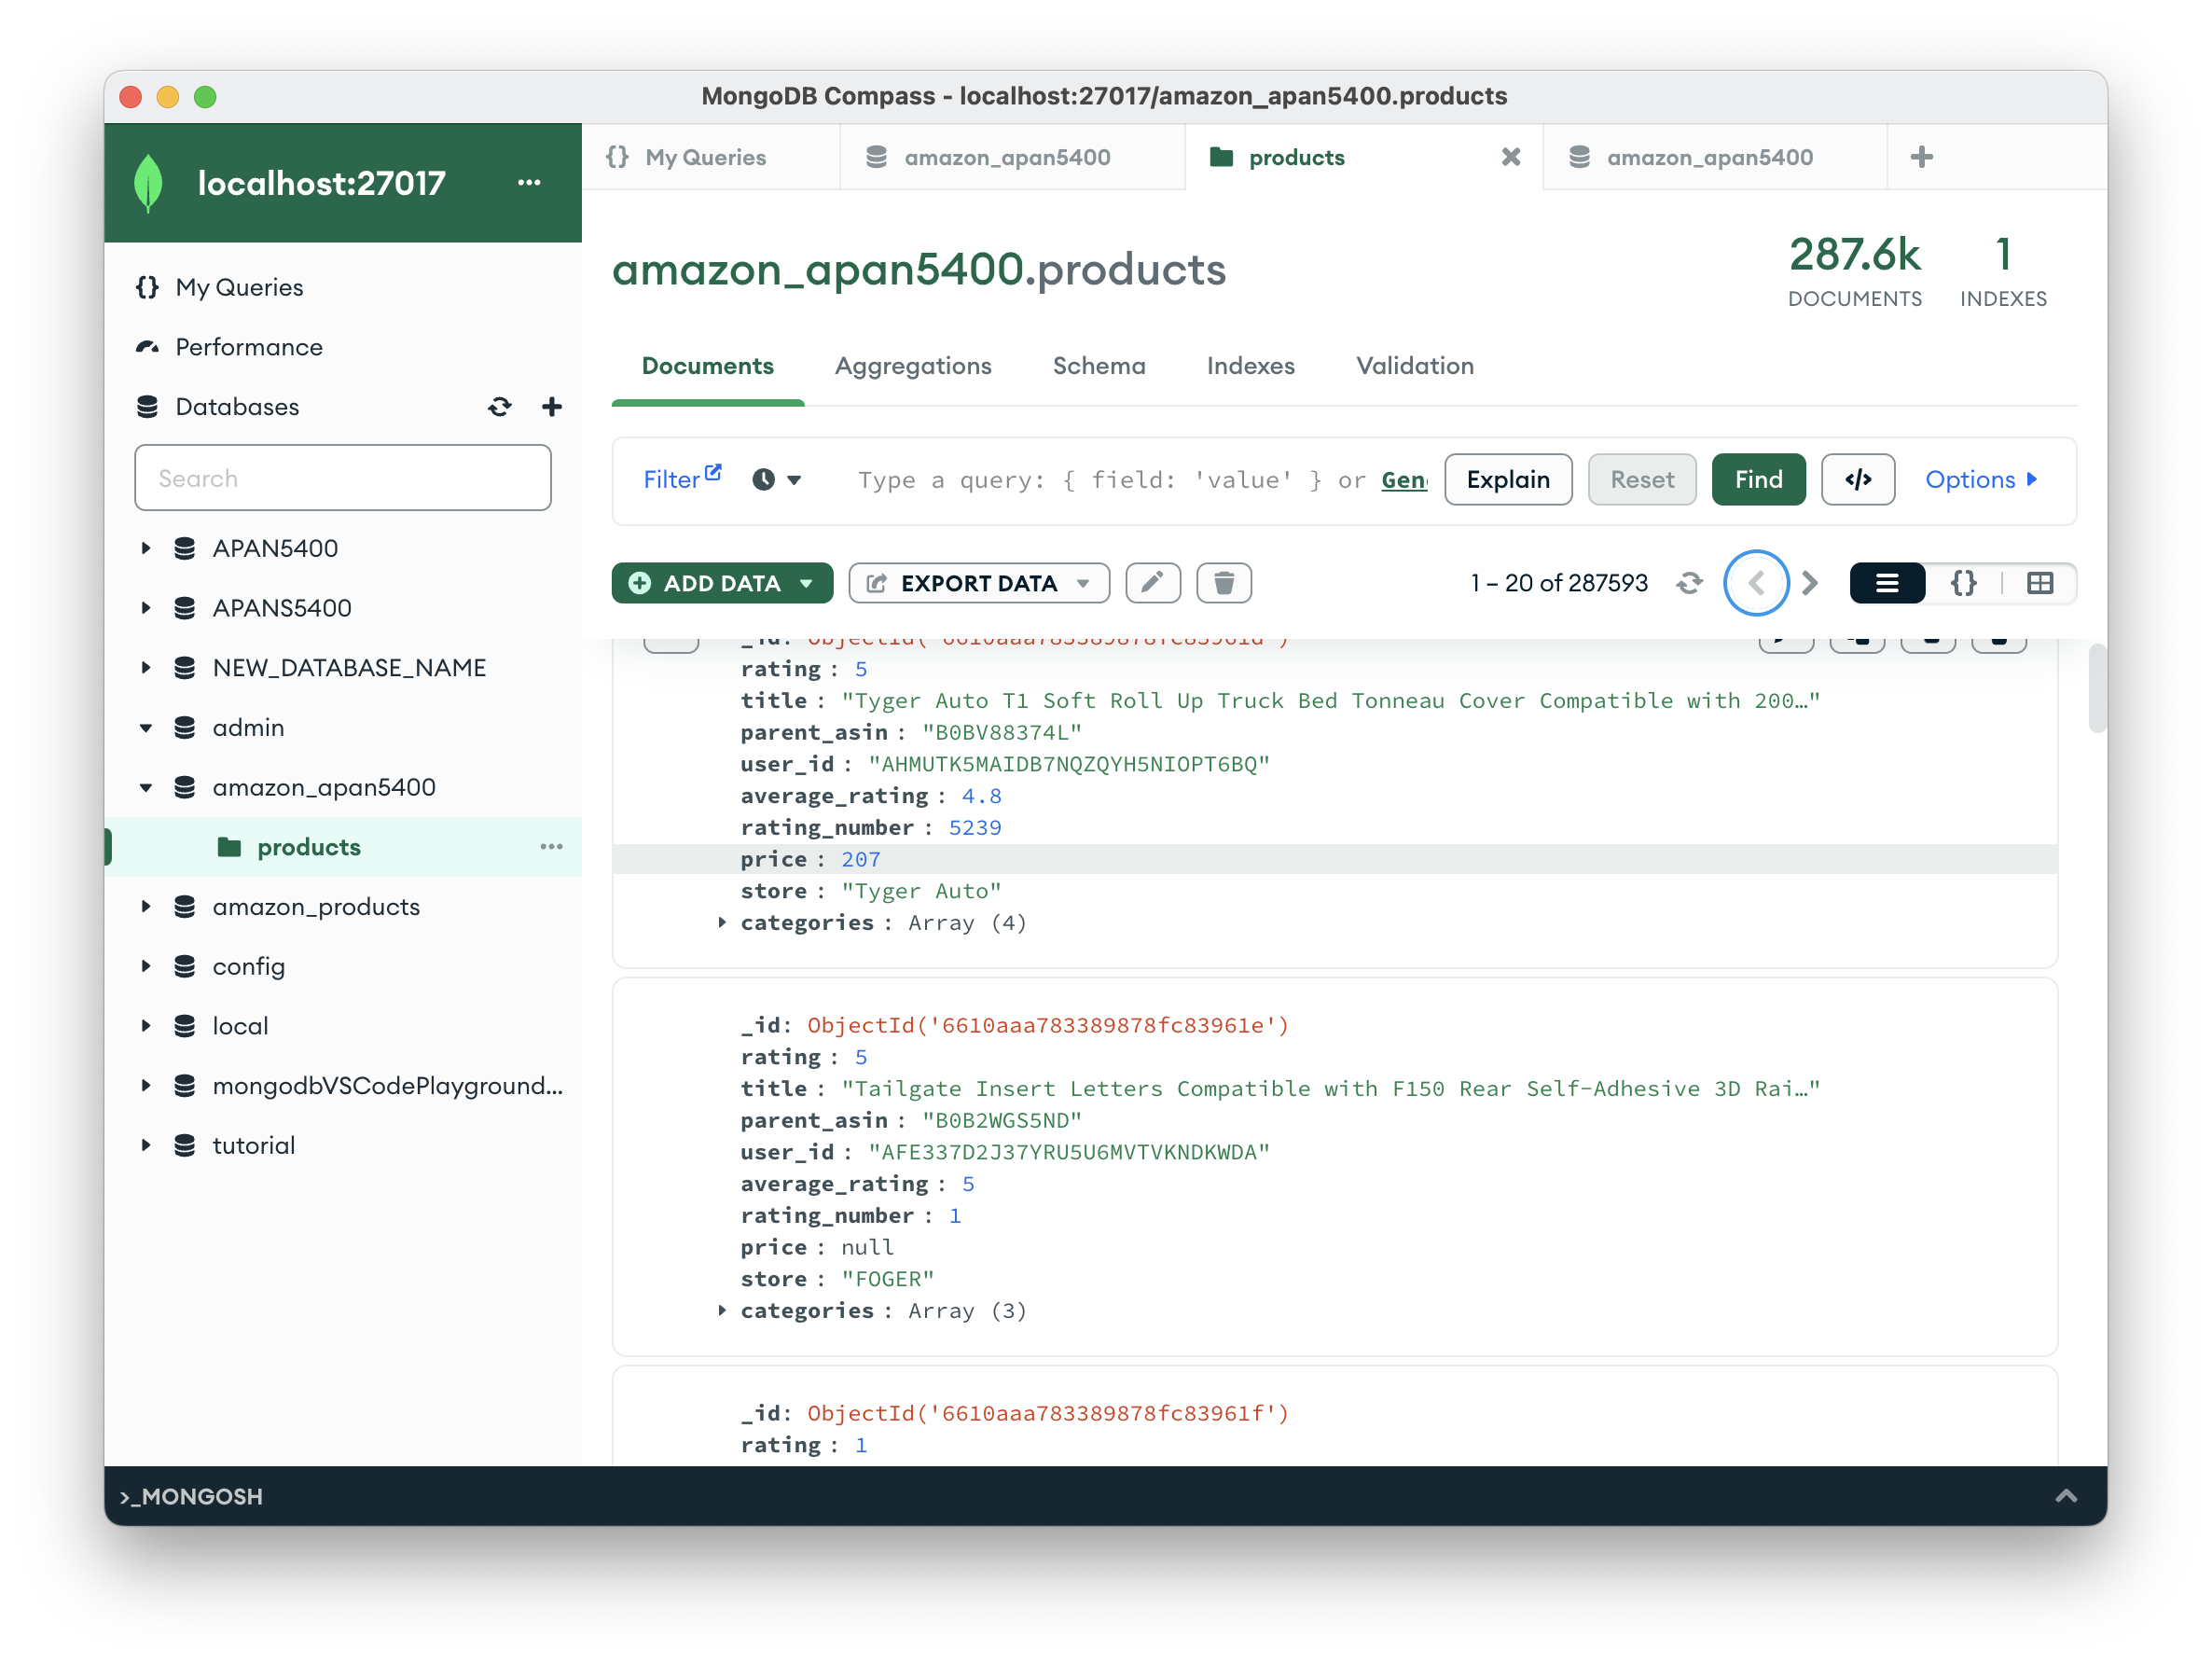

In [5]:
collection_names = db.list_collection_names()

for collection_name in collection_names:
    print(collection_name)

products


In [6]:
#Product Information for Specific Parent ASIN

parent_asin_to_find = 'B0BV88374L'
matching_products = [product for product in newsfeeds if product.get('parent_asin') == parent_asin_to_find]

if matching_products:
    for product in matching_products:
        print("Product Information:")
        for key, value in product.items():
            print(f"{key}: {value}")
else:
    print(f"No information found for parent_asin {parent_asin_to_find}.")


Product Information:
rating: 5.0
title: Tyger Auto T1 Soft Roll Up Truck Bed Tonneau Cover Compatible with 2004-2012 Chevy Colorado / GMC Canyon; 2006-2008 Isuzu I280 | Fleetside 6'1" Bed (72") | TG-BC1C9002
parent_asin: B0BV88374L
user_id: AHMUTK5MAIDB7NQZQYH5NIOPT6BQ
average_rating: 4.8
rating_number: 5239
price: 207.0
store: Tyger Auto
categories: ['Automotive', 'Exterior Accessories', 'Truck Bed & Tailgate Accessories', 'Tonneau Covers']


In [7]:
#Retrieve Information for All Products Sold by This Store
store_to_find = 'Tyger Auto'
matching_products = [product for product in newsfeeds if product.get('store') == store_to_find]

if matching_products:
    for product in matching_products:
        print("Product Information:")
        for key, value in product.items():
            print(f"{key}: {value}")
else:
    print(f"No information found for store {store_to_find}.")


Product Information:
rating: 5.0
title: Tyger Auto T1 Soft Roll Up Truck Bed Tonneau Cover Compatible with 2004-2012 Chevy Colorado / GMC Canyon; 2006-2008 Isuzu I280 | Fleetside 6'1" Bed (72") | TG-BC1C9002
parent_asin: B0BV88374L
user_id: AHMUTK5MAIDB7NQZQYH5NIOPT6BQ
average_rating: 4.8
rating_number: 5239
price: 207.0
store: Tyger Auto
categories: ['Automotive', 'Exterior Accessories', 'Truck Bed & Tailgate Accessories', 'Tonneau Covers']
Product Information:
rating: 5.0
title: Tyger Auto TG-TR8J84078 Oversize Tire Carrier Kit Compatible with 2007-2018 Jeep Wrangler JK (Not for JL) | Textured Black Fits up to 37inch Spare Tire
parent_asin: B07ZZJLKM2
user_id: AE5BLKSC7QLQKIOMWGFNWR5OLNSA
average_rating: 4.5
rating_number: 158
price: 289.0
store: Tyger Auto
categories: ['Automotive', 'Exterior Accessories', 'Spare Tire Carriers']
Product Information:
rating: 5.0
title: TYGER Towing Combo: 2inch Receiver Hitch & Wiring Harness & Hitch Cover Fits 2007-2018 Wrangler JK 2Dr & 4Dr (Exclud

In [8]:
# Retrieve Information for Specific User ID
user_id_to_find = 'AHHFQKI7Q2OWPE66C5UZ3BKDDNXA'
matching_products = [product for product in newsfeeds if product.get('user_id') == user_id_to_find]

if matching_products:
    for product in matching_products:
        print("Product Information:")
        for key, value in product.items():
            print(f"{key}: {value}")
else:
    print(f"No information found for store {user_id_to_find}.")


Product Information:
rating: 5.0
title: A-Premium Power Window Regulator with Motor Replacement for Kia Optima Magentis Hyundai Sonata 1999-2006 Front Left Driver Side
parent_asin: B094VSXGP5
user_id: AHHFQKI7Q2OWPE66C5UZ3BKDDNXA
average_rating: 4.2
rating_number: 38
price: 39.59
store: A-Premium
categories: ['Automotive', 'Replacement Parts', 'Window Regulators & Motors', 'Window Regulator & Motor Assemblies']
Product Information:
rating: 5.0
title: Delphi TC7582 Control Arm
parent_asin: B079YT95HR
user_id: AHHFQKI7Q2OWPE66C5UZ3BKDDNXA
average_rating: 5.0
rating_number: 1
price: 48.89
store: Delphi
categories: ['Automotive', 'Replacement Parts', 'Shocks, Struts & Suspension', 'Control Arms & Parts', 'Control Arms']


## Establish an Interface Between Customers and Amazon Automotive Products

In [ ]:
# Import Flask to Create Two Search Web Pages: Parent ASIN and Stores

from flask import Flask, render_template, request
from pymongo import MongoClient

app = Flask(__name__)

client = MongoClient("mongodb://localhost:27017/")
db = client.amazon_apan5400
product_collection = db.products


@app.route('/', methods=['GET', 'POST'])
def search():
    product_info = None
    if request.method == 'POST':
        search_by = request.form.get('info')
        if search_by == 'parent_asin':
            parent_asin = request.form.get('search_query')
            product_info = product_collection.find({"parent_asin": parent_asin})
            show_rating = True
        elif search_by == 'store':
            store = request.form.get('search_query')
            product_info = product_collection.find({"store": store})
            show_rating = False

        if product_info:
            product_info = list(product_info)
            product_info.sort(key=lambda x: x.get('average_rating', 0), reverse=True)
        
        return render_template('search.html', product_info=product_info)
    return render_template('index.html')

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
# search.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Product Search Results</title>

    <style>
        .product-box {
            border: 1px solid #ccc;
            padding: 10px;
            margin-bottom: 10px;
            border-radius: 5px;
            background-color: #f9f9f9;
        }

        /* Add some space between each product box */
        .product-box + .product-box {
            margin-top: 20px;
        }
    </style>

</head>
<body>
    {% if product_info %}
        <div>
            <h3>Product Information</h3>
            {% for product in product_info %}
            <div class="product-box">
                <p>Parent ASIN: {{ product['parent_asin'] }}</p>
                <p>Title: {{ product['title'] }}</p>
                {% if show_rating %}
                <p>Rating: {{ product['rating'] }}</p>
                {% endif %}
                <p>Average Rating: {{ product['average_rating'] }}</p>
                <p>Rating Number: {{ product['rating_number'] }}</p>
                <p>Price: ${{ product['price'] }}</p>
                <p>Store: {{ product['store'] }}</p>
                <p>Categories: {{ product['categories'] }}</p>
            </div>
            {% endfor %}
        </div>
    {% else %}
        <p>No product information found.</p>
    {% endif %}
</body>
</html>


In [ ]:
# index.html
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>

    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-image: url('static/images/amazon1.jpg');
            background-size: 100%; 
            background-repeat: no-repeat;
            background-position: center; }
        
    
        form {
            background-color: rgba(255, 255, 255, 0.9);
                padding: 30px;
                border-radius: 8px;
                box-shadow: 0 3px 7px rgba(0,0,0,0.1);
                max-width: 900px;
                max-height:700px;
                margin: 50px auto;
                margin-top: 120px;
        }
    
        input[type="text"] {
                padding: 10px;
                margin-right: 10px;
                border-radius: 4px;
                border: 1px solid #ddd;
                width: calc(100% - 122px);
                font-size: 16px;
        }
    
        input[type="submit"] {
                padding: 10px 30px;
                background-color: #5F9EA0;
                color: black;
                border: none;
                font-size: 14px;
                border-radius: 4px;
                cursor: pointer;}

        input[type="radio"] {
                margin: 9px; 
                font-size: 12px;
                color: #444;
                
        }

        h1 {
                color: white;
                font-size: 40px;
        }
            
        h3 {
                color: #444;
        }
    
        p {
                color: #666;
        }
    </style>
    
</head>

    <body>
        
        <h1>AutoAmazon</h1>

        <form method="post">
            <p>
                <input type="text" name="search_query">
                <input type="submit" class="button" value="Search">
            </p>
            <p>
                <input type="radio" name="info" value="parent_asin" checked> Parent ASIN
                <input type="radio" name="info" value="store"> Store
            </p>
            
        </form>
    </body>
</html>


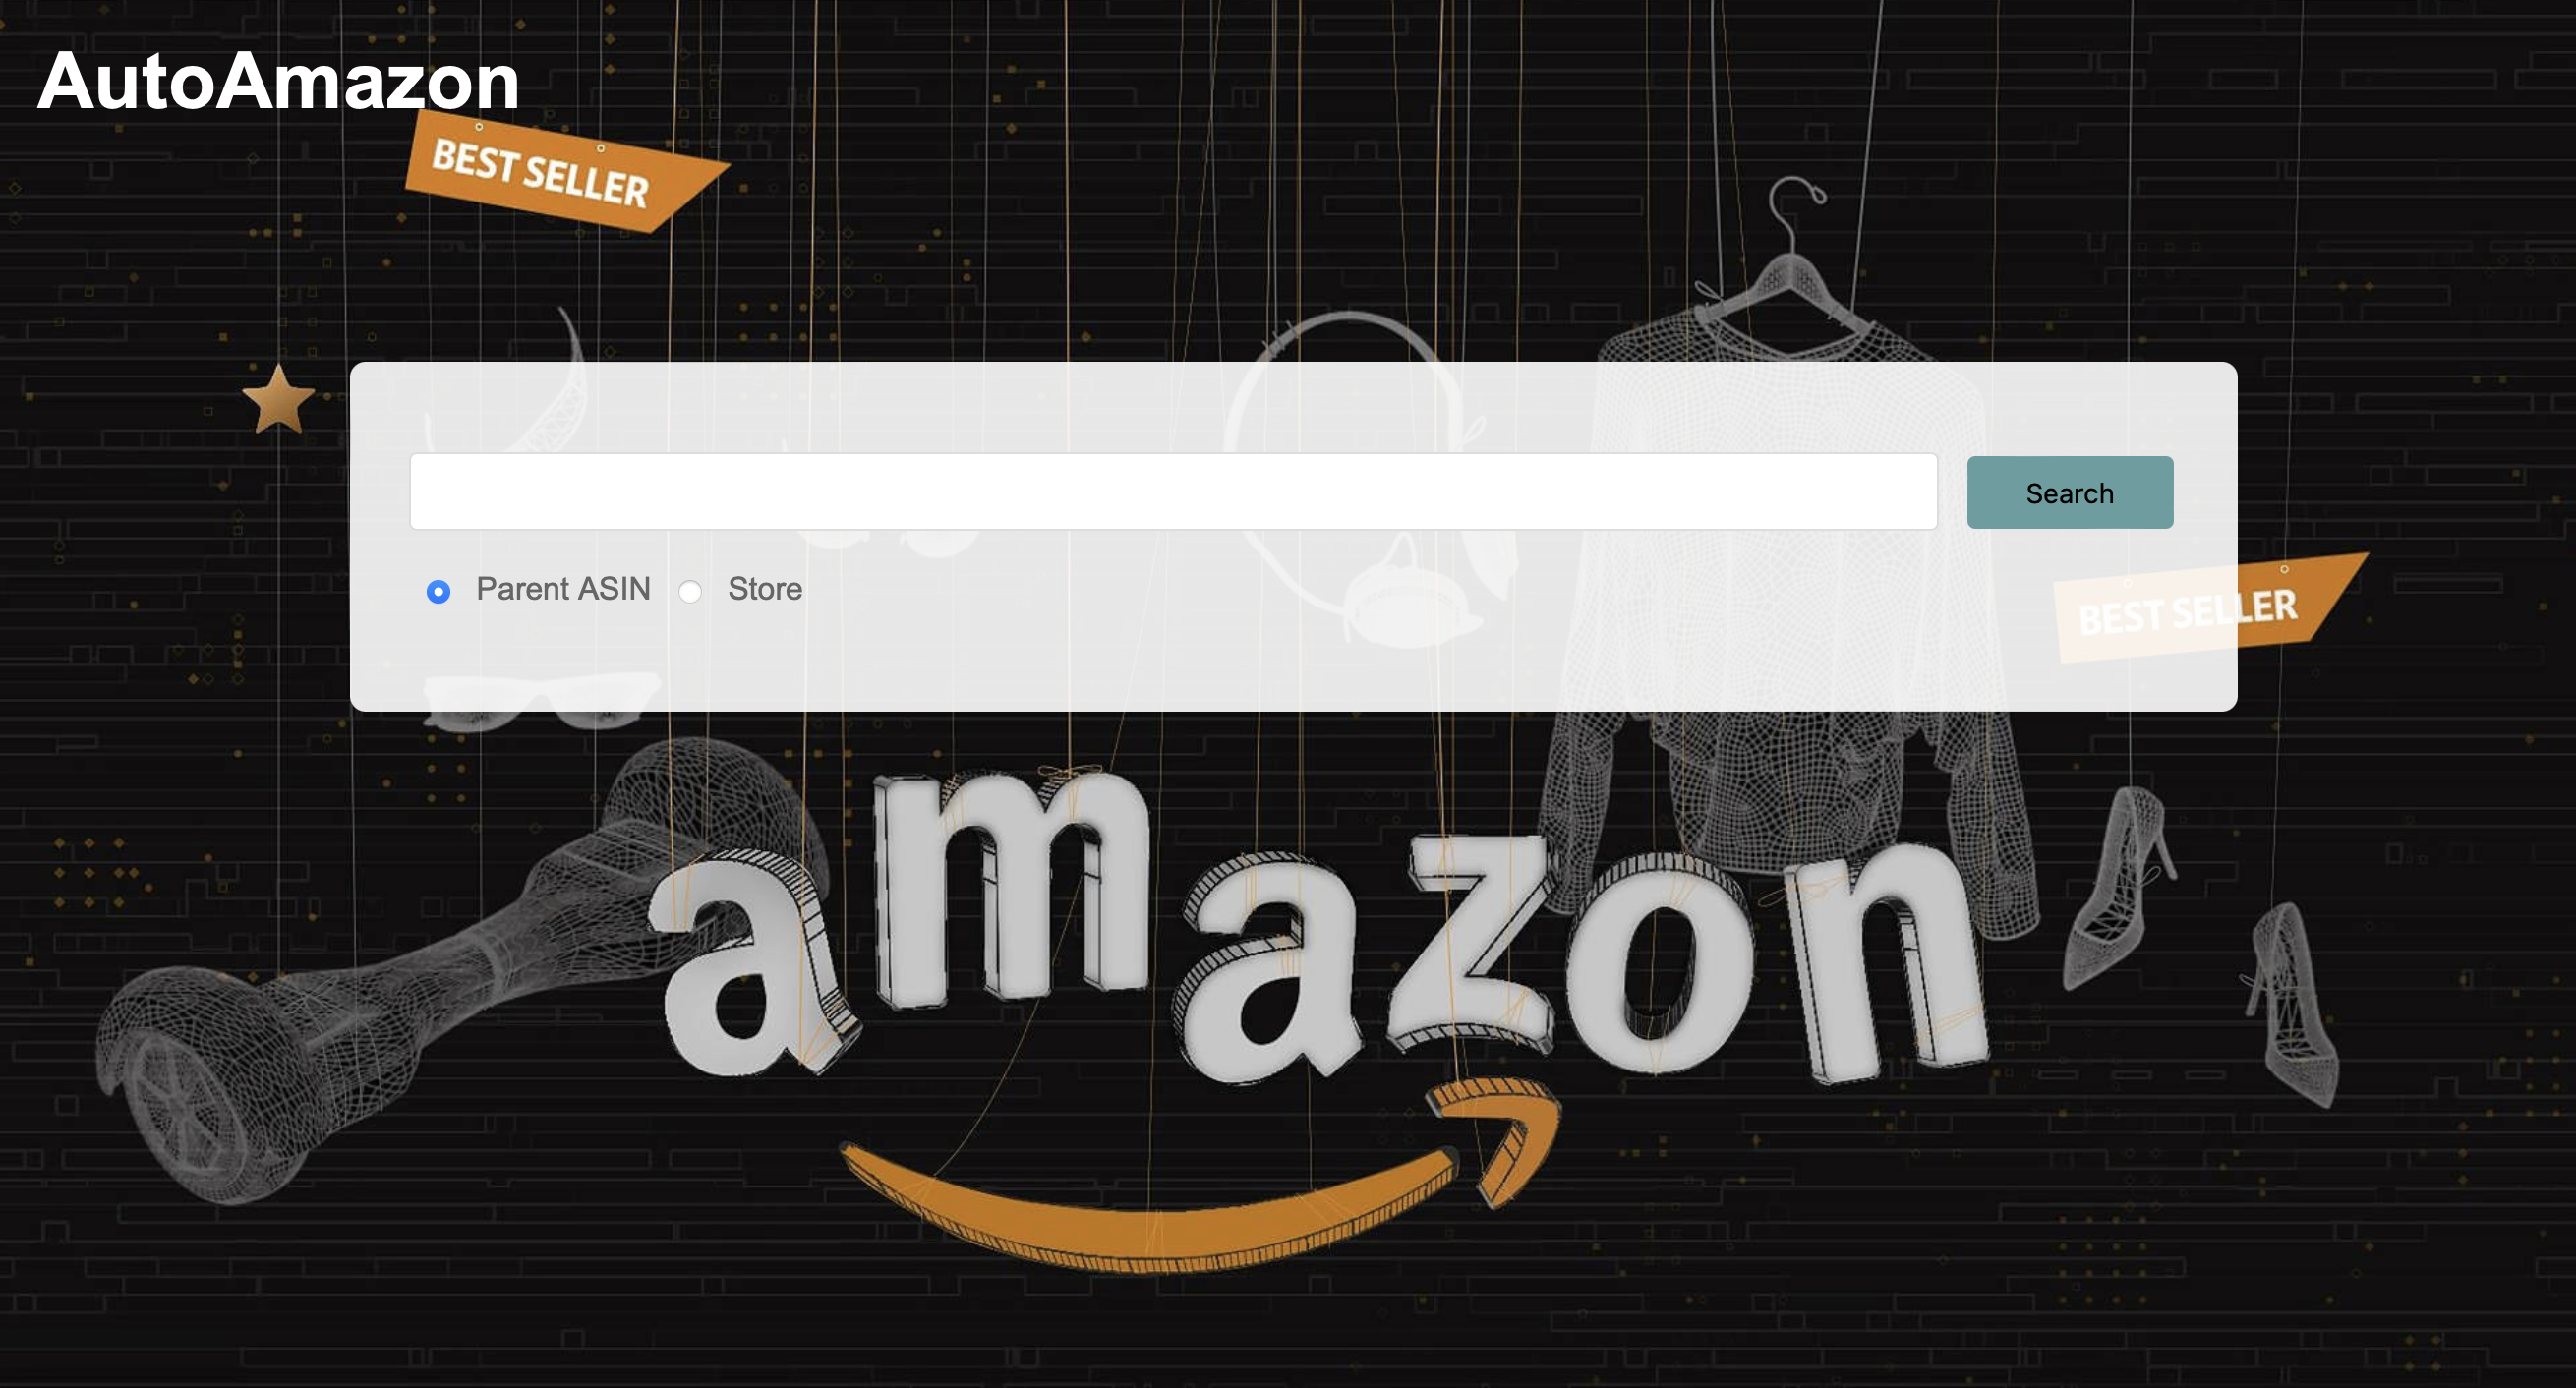

#### Enter Parent ASIN:

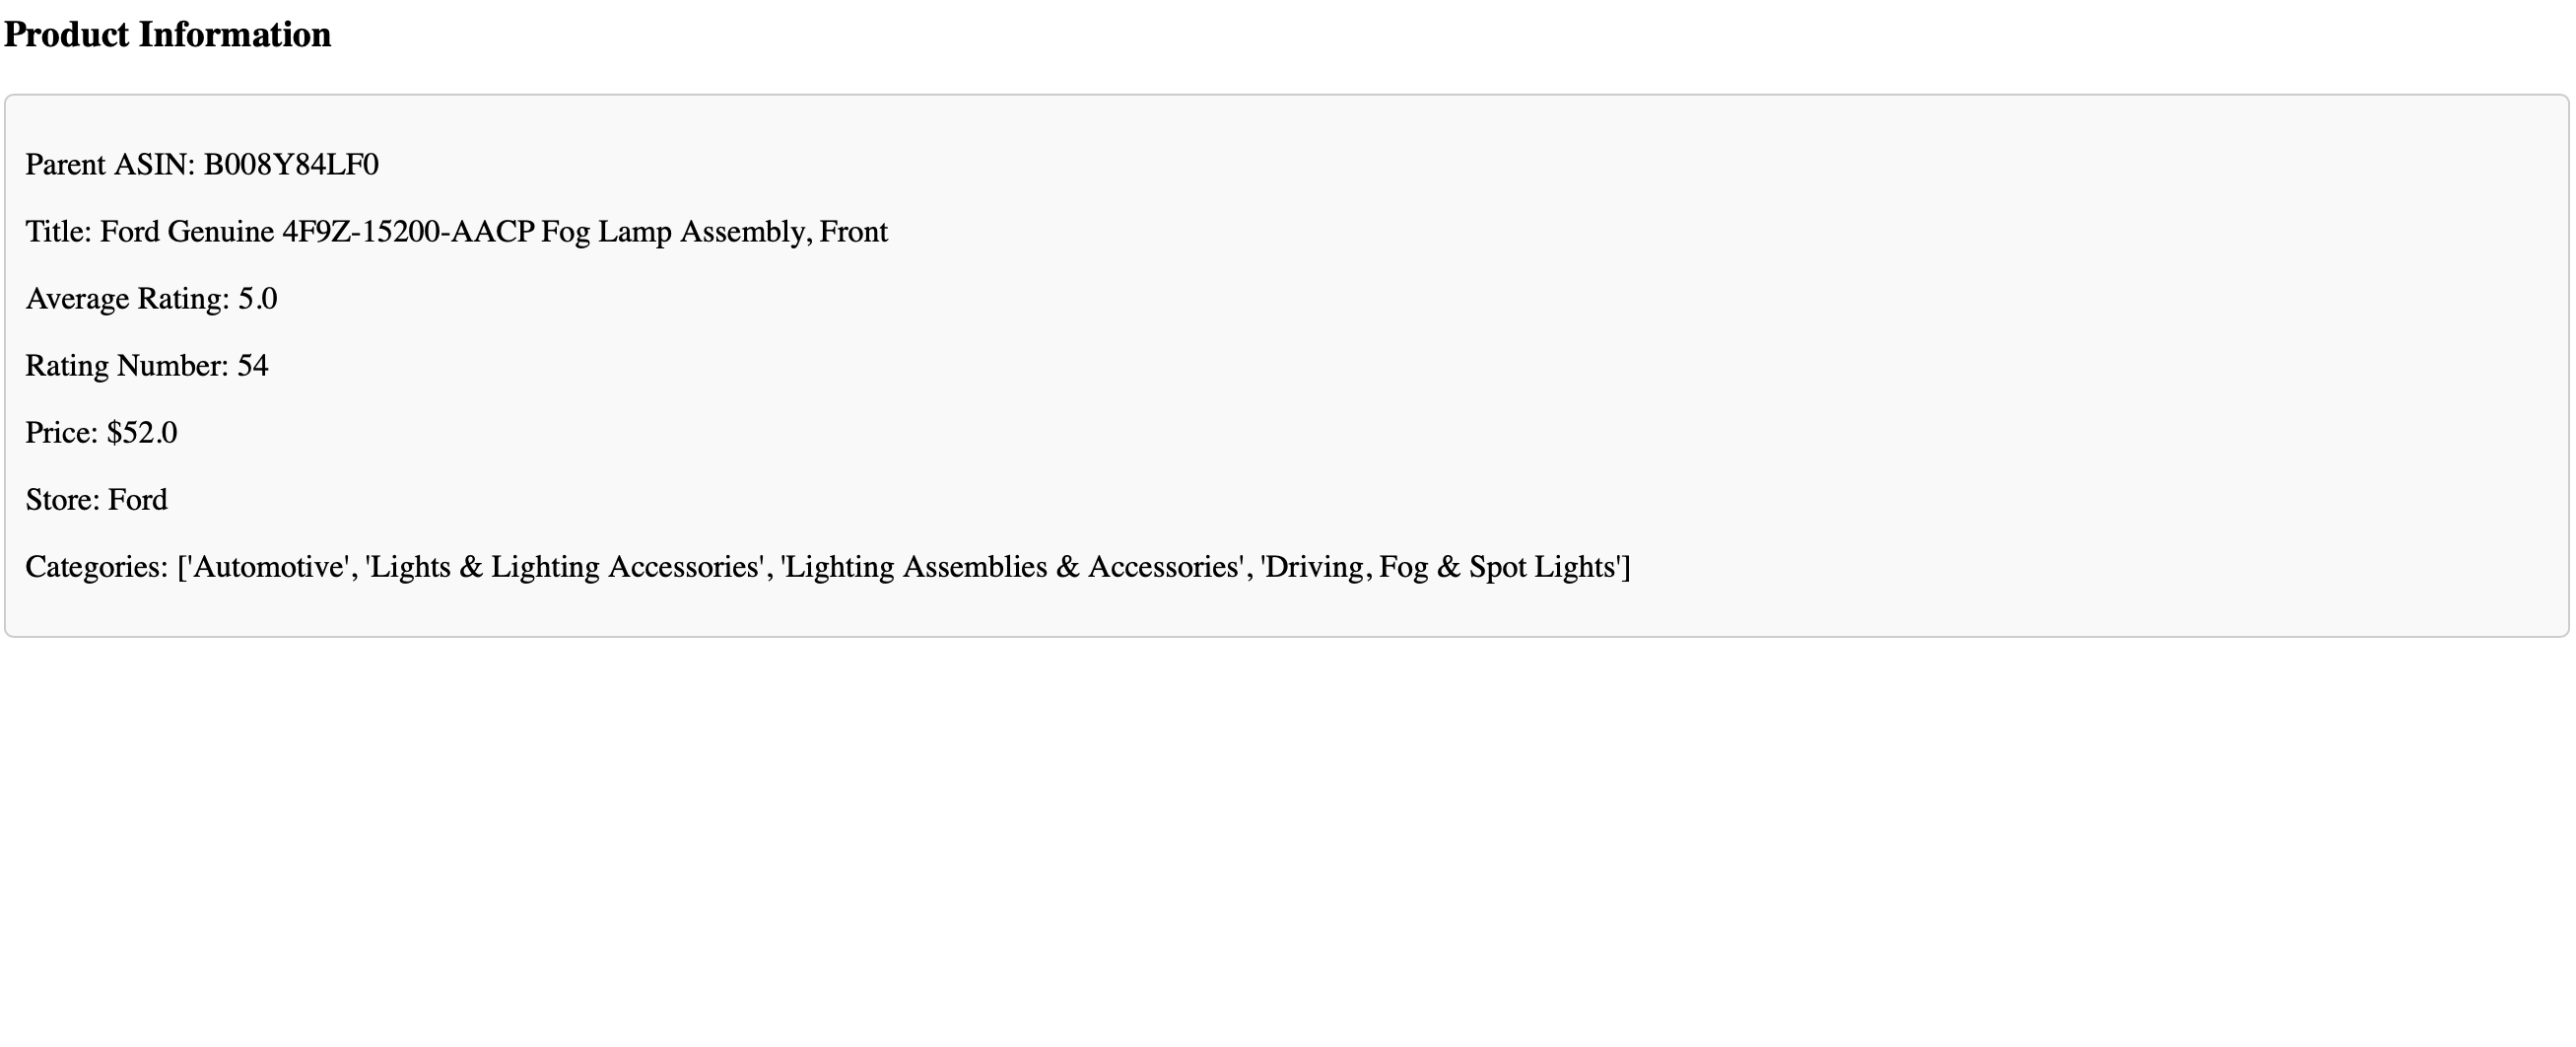

#### Enter Stores Name:
(Product infos sorted by average rating)

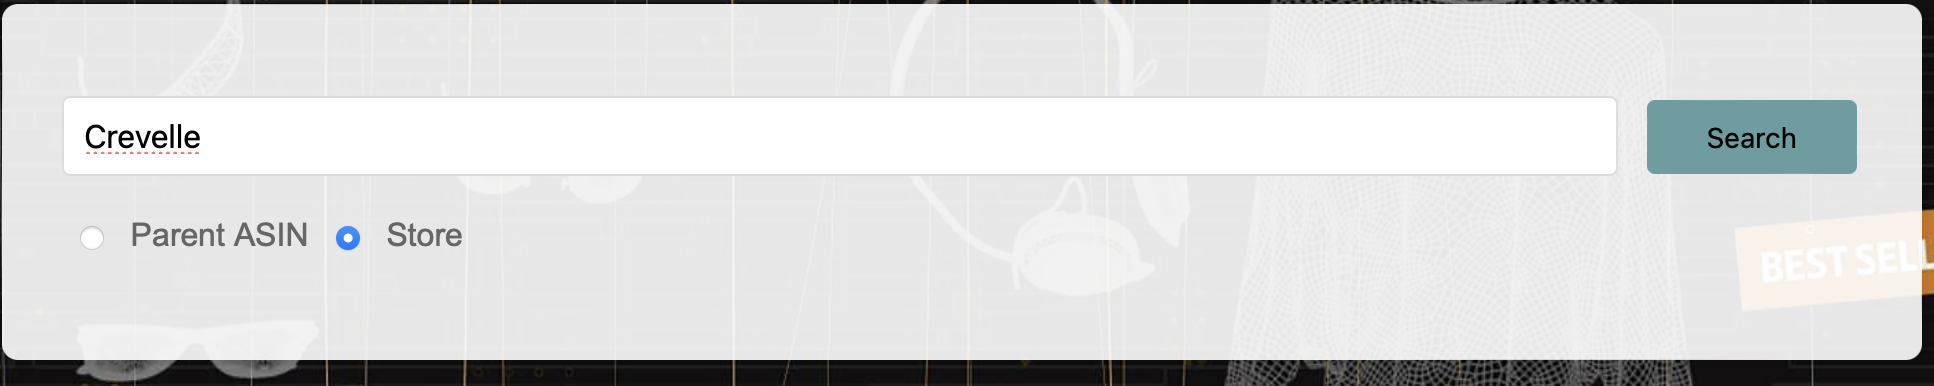

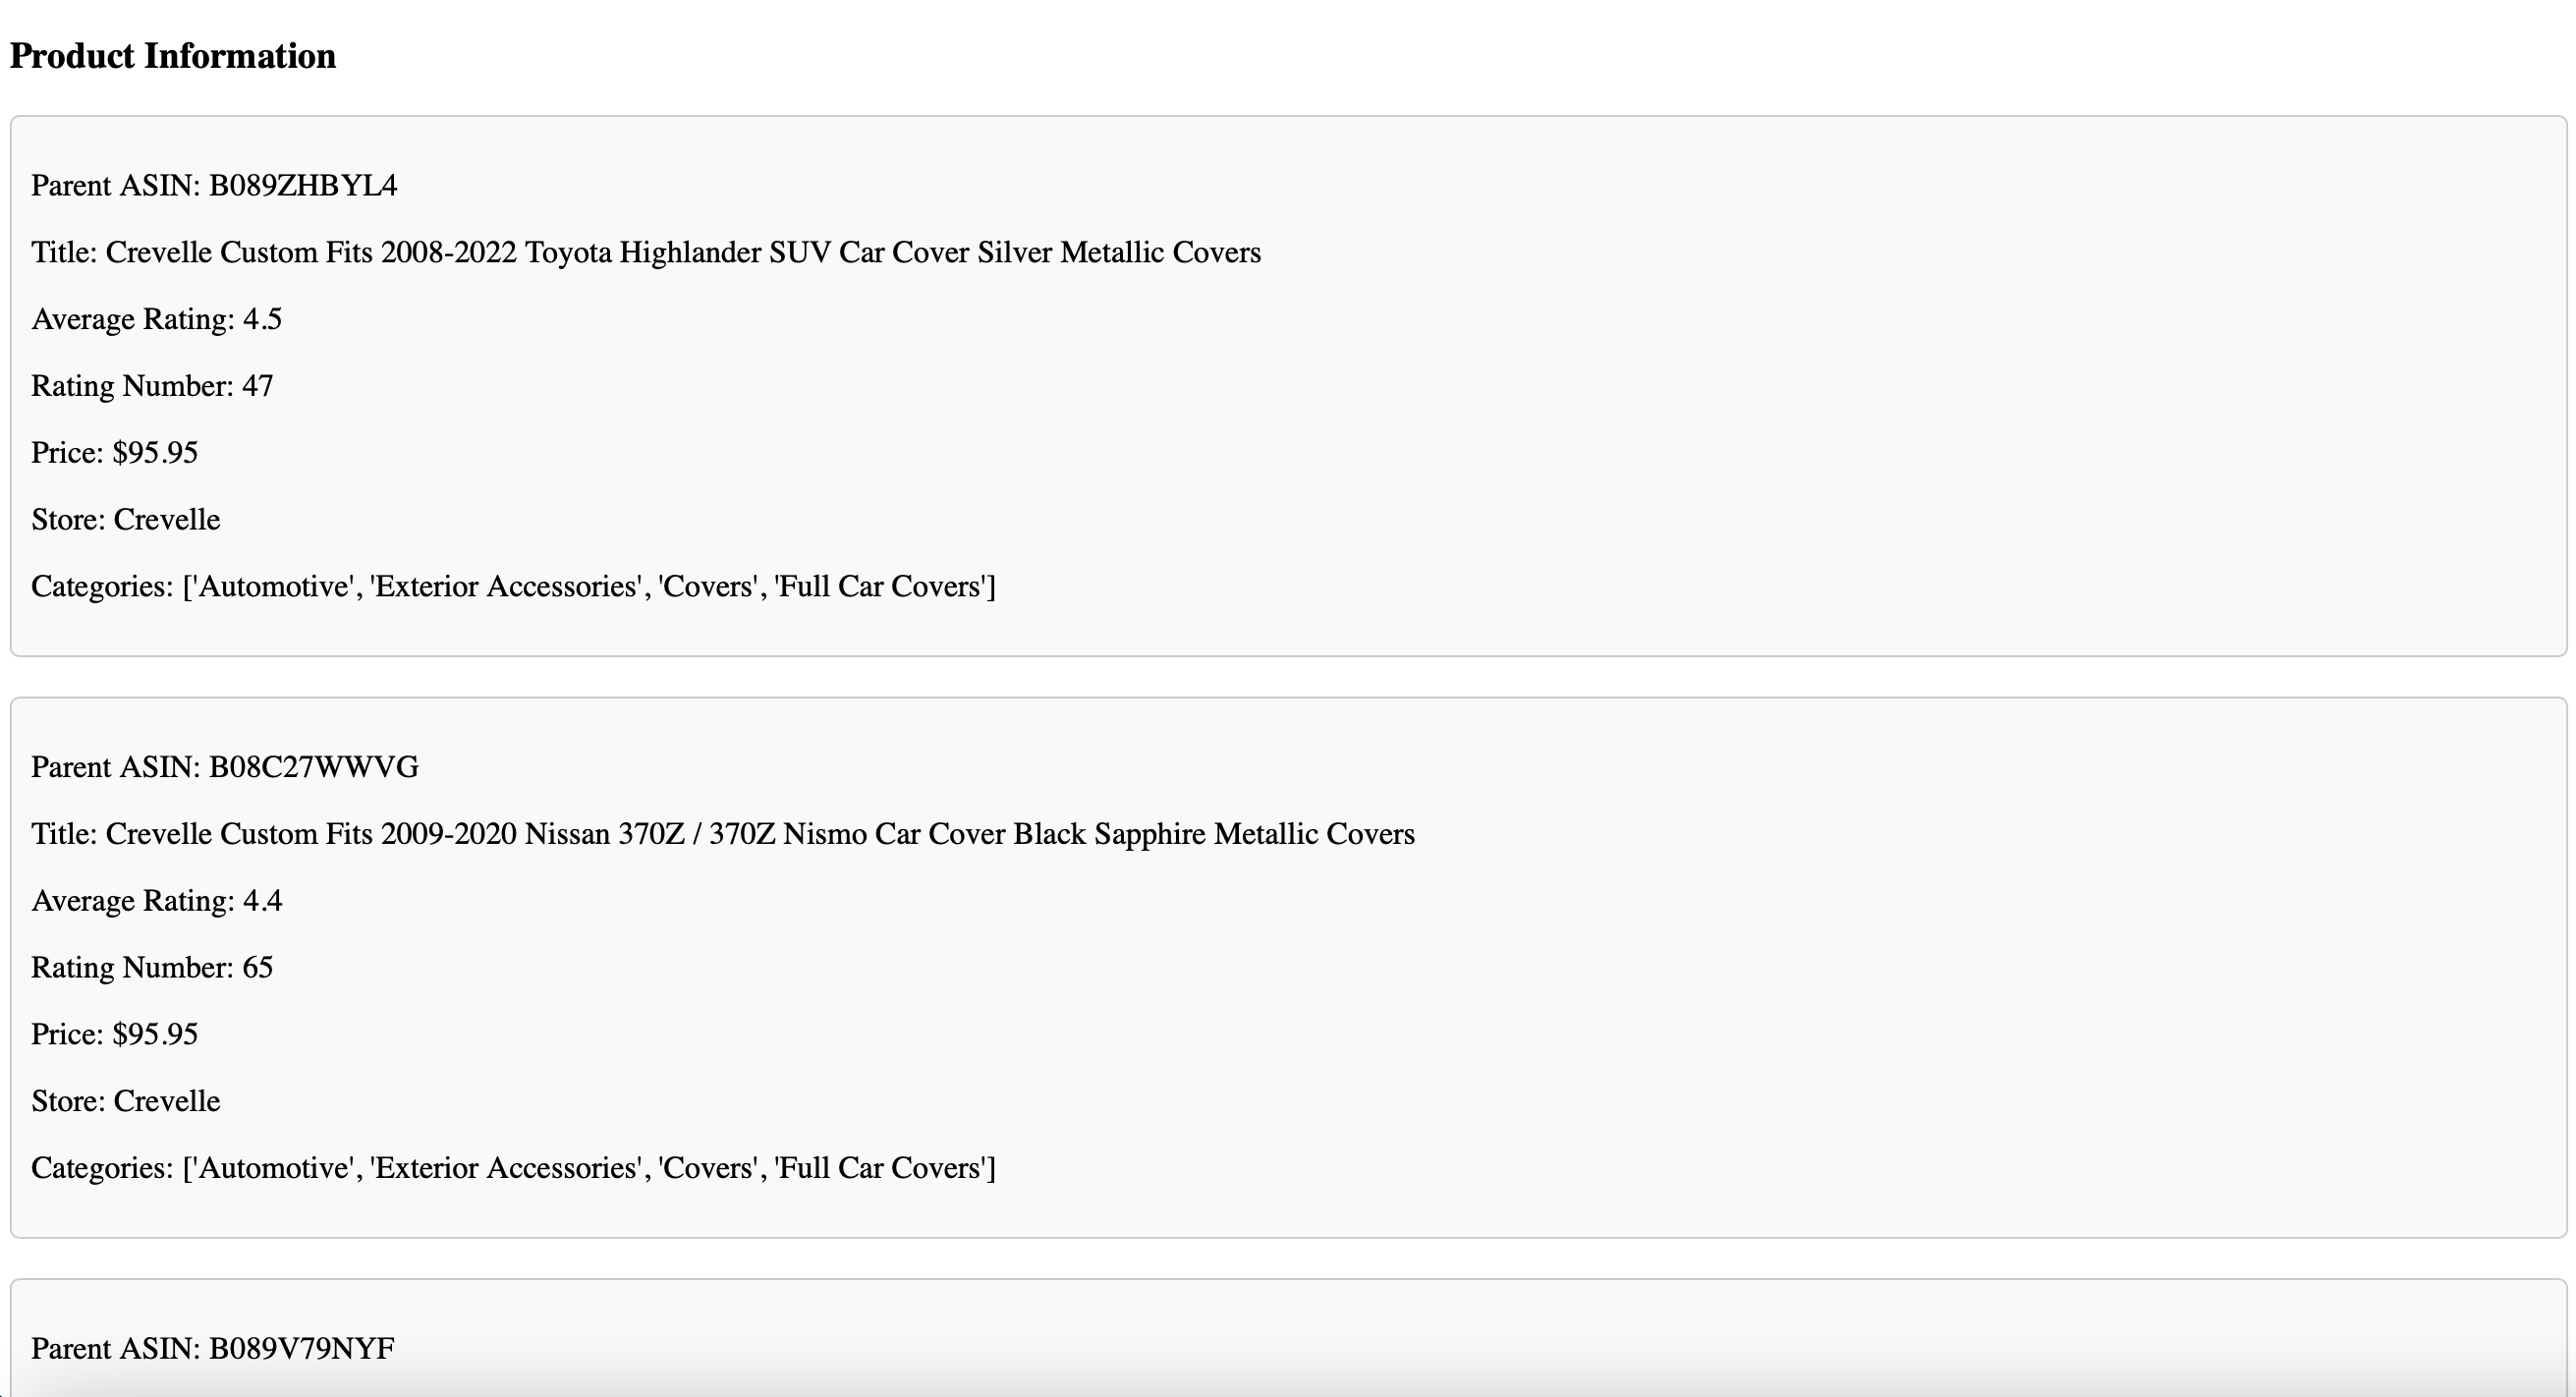

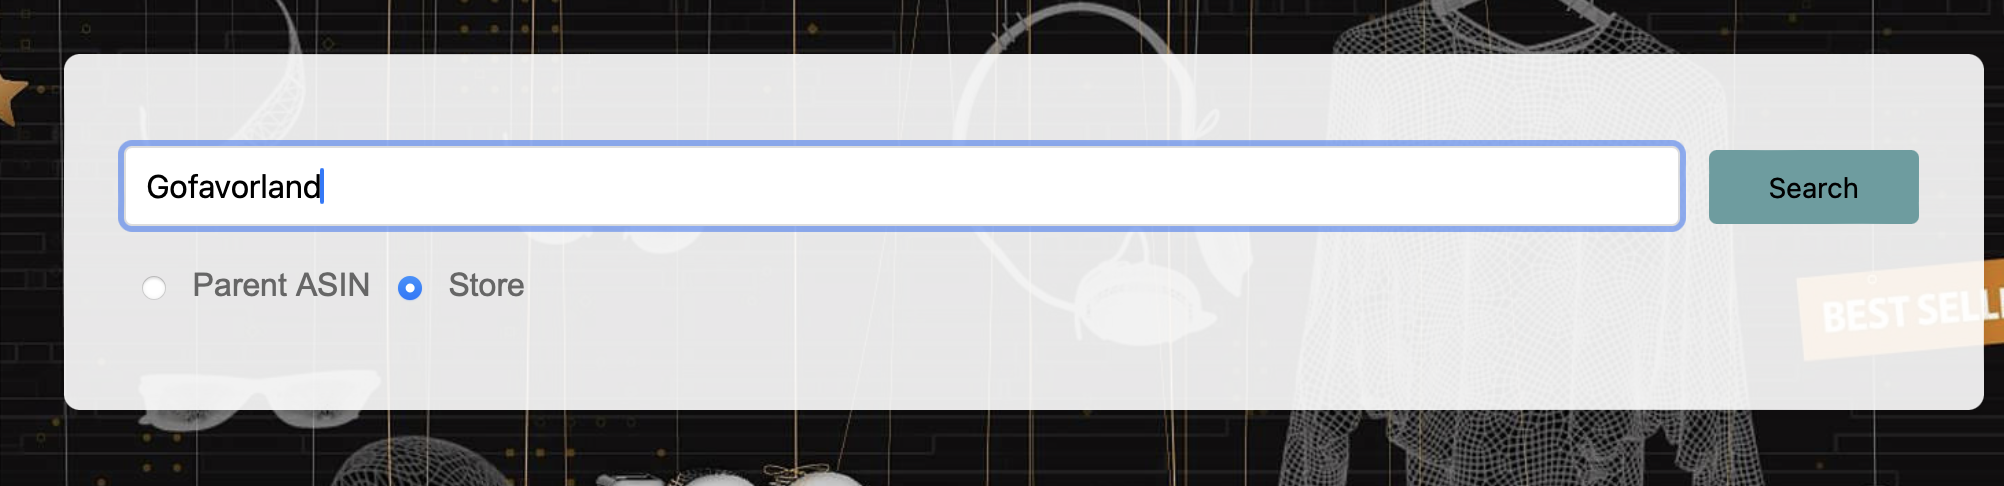

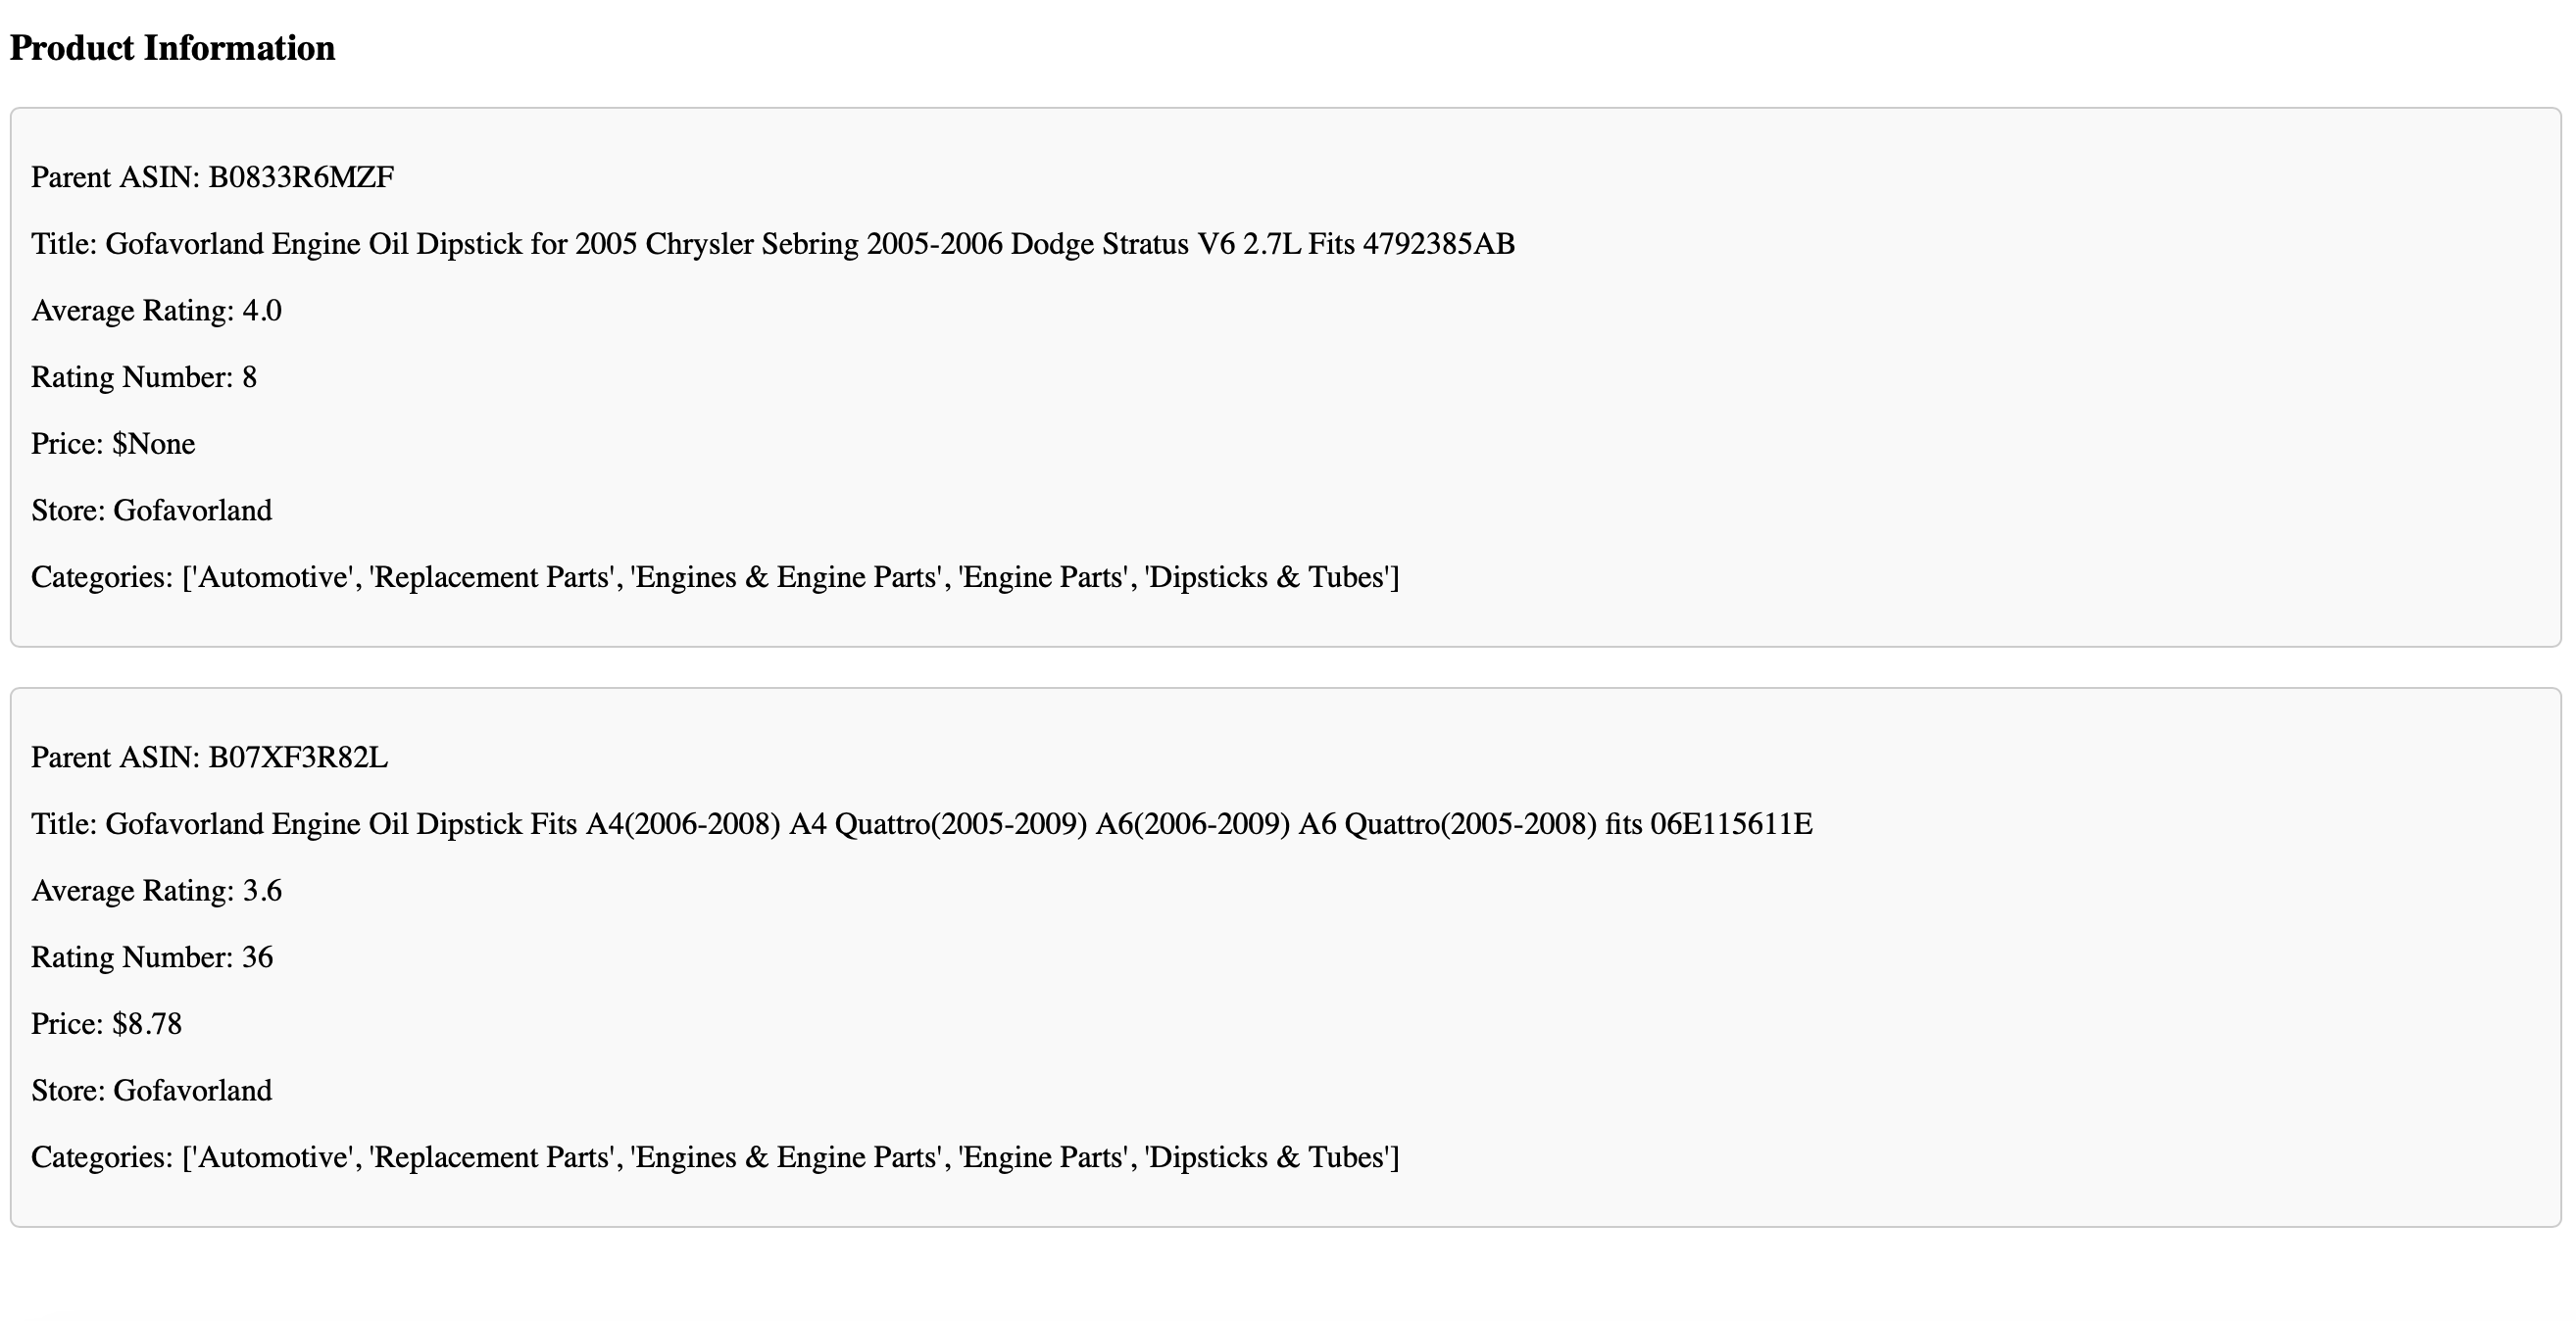